In [1]:
#%matplotlib inline
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

from scipy import stats
import scipy.stats as st
from scipy.stats import linregress
import scipy.stats as stats

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect= True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)


# Step 1 - Climate Analysis and Exploration

In [10]:
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(measurement.date).group_by(measurement.date).order_by(measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [11]:
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prcp_avg = [measurement.date,
           func.avg(measurement.prcp)]

precipitation = session.query(*prcp_avg).\
    filter(measurement.date >= '2016-08-23').\
    group_by(measurement.date).\
    order_by(measurement.date).all()
print(precipitation)


[('2016-08-23', 0.45166666666666666), ('2016-08-24', 1.5549999999999997), ('2016-08-25', 0.07714285714285715), ('2016-08-26', 0.016666666666666666), ('2016-08-27', 0.06399999999999999), ('2016-08-28', 0.5166666666666666), ('2016-08-29', 0.24333333333333332), ('2016-08-30', 0.011666666666666667), ('2016-08-31', 0.6359999999999999), ('2016-09-01', 0.006), ('2016-09-02', 0.05), ('2016-09-03', 0.254), ('2016-09-04', 0.276), ('2016-09-05', 0.08499999999999999), ('2016-09-06', 0.246), ('2016-09-07', 0.3333333333333333), ('2016-09-08', 0.07666666666666667), ('2016-09-09', 0.17833333333333332), ('2016-09-10', 0.27999999999999997), ('2016-09-11', 0.25), ('2016-09-12', 0.308), ('2016-09-13', 0.45166666666666666), ('2016-09-14', 2.3800000000000003), ('2016-09-15', 0.8266666666666667), ('2016-09-16', 0.11714285714285715), ('2016-09-17', 0.13599999999999998), ('2016-09-18', 0.10600000000000001), ('2016-09-19', 0.064), ('2016-09-20', 0.14714285714285716), ('2016-09-21', 0.19499999999999998), ('2016-

# Precipitation Analysis

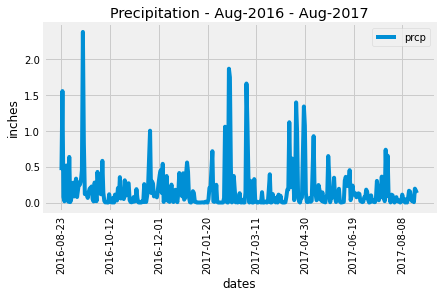

In [13]:
prcp_df = pd.DataFrame(precipitation, columns=['date', 'prcp'])
prcp_df.set_index('date', inplace=True)
prcp_df.plot(rot=90)
#plt.figure(figsize=(20,5))
#plt.bar(prcp_df.index, prcp_df["prcp"], color= "r", alpha= 0.5, align= "center")
plt.tight_layout()
plt.title("Precipitation - Aug-2016 - Aug-2017")
plt.xlabel("dates")
plt.ylabel("inches")
plt.show()


In [14]:
# Perform a query to retrieve the data and precipitation scores
date_score = session.query(measurement.date, measurement.prcp).all()
print(date_score)


[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
score_df = pd.DataFrame(date_score, columns=['date', 'prcp'])
score_df.set_index('date', inplace=True)
score_df.head()


,prcp
date,
2010-01-01,0.08
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-06,NaN


In [16]:
# Sort the dataframe by date
sorted_df = score_df.sort_values(["date"])
sorted_df.head()


,prcp
date,
2010-01-01,0.08
2010-01-01,0.21
2010-01-01,0.15
2010-01-01,0.15
2010-01-01,0.05


In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
score_avg = [measurement.date,
           func.avg(measurement.prcp)]

score = session.query(*score_avg).\
    group_by(measurement.date).\
    order_by(measurement.date).all()
print(score)

[('2010-01-01', 0.15142857142857144), ('2010-01-02', 0.002857142857142857), ('2010-01-03', 0.0), ('2010-01-04', 0.0014285714285714286), ('2010-01-05', 0.005), ('2010-01-06', 0.11600000000000002), ('2010-01-07', 0.27499999999999997), ('2010-01-08', 0.008571428571428572), ('2010-01-09', 0.002857142857142857), ('2010-01-10', 0.002857142857142857), ('2010-01-11', 0.12571428571428572), ('2010-01-12', 0.002857142857142857), ('2010-01-13', 0.0033333333333333335), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0014285714285714286), ('2010-01-21', 0.10833333333333334), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.0033333333333333335), ('2010-01-25', 0.0), ('2010-01-26', 0.03571428571428571), ('2010-01-27', 0.2285714285714286), ('2010-01-28', 0.12166666666666666), ('2010-01-29', 0.438), ('2010-01-30', 1.4700000000000002), ('2010-01-31', 0.36000000000000004), ('2010-02-01', 0.008333333333

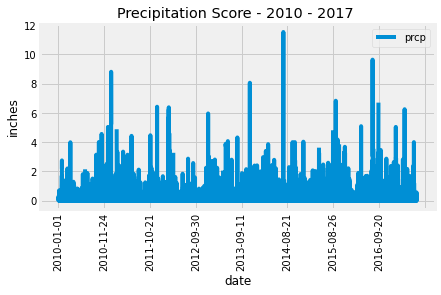

In [18]:
sorted_df.plot(rot=90)
plt.tight_layout()
plt.title("Precipitation Score - 2010 - 2017 ")
plt.ylabel("inches")
plt.show()


In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
statistics = session.query(measurement.prcp).all()
summary_df = pd.DataFrame(statistics, columns=['prcp'])
summary_df.describe()


,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Station Analysis

In [20]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(station.station).count()
print(stations)


9


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_st = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
print(active_st)


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active_st = session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == "USC00519281").all()
print(active_st)

[('USC00519281', 54.0, 85.0, 71.66378066378067)]


In [23]:
# Choose the station with the highest number of temperature observations.
temp_count = session.query(measurement.station, func.count(measurement.tobs)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.tobs).desc()).all()
print(temp_count)


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [24]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(measurement.tobs).\
    filter(measurement.date >= '2016-08-23', measurement.station == 'USC00519281').statement
print(temp_obs)

temp_df = pd.read_sql_query(temp_obs, session.bind)
temp_df.head()


SELECT measurement.tobs 
FROM measurement 
WHERE measurement.date >= :date_1 AND measurement.station = :station_1


,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


Text(0, 0.5, 'Frequency')

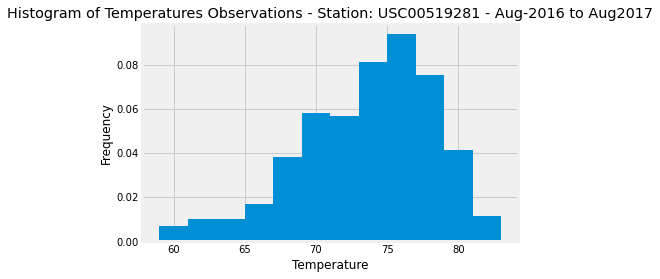

In [25]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(temp_df["tobs"], bins=12, density=True)
plt.title("Histogram of Temperatures Observations - Station: USC00519281 - Aug-2016 to Aug2017")
plt.xlabel("Temperature")
plt.ylabel("Frequency")


# Bonus Challenge Assignment

# Temperature Analysis II

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


### My Trip Dates = 01-Jul-2017 to 15-Jul-2017

In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-07-01', '2016-07-15'))


[(71.0, 77.06382978723404, 82.0)]


Text(0, 0.5, 'Temperature (F)')

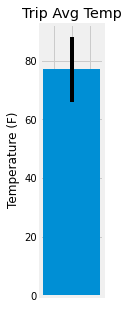

In [28]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_df = pd.DataFrame(calc_temps('2016-07-01', '2016-07-15'), columns= ['tmin', 'tavg', 'tmax'])
trip1_df = trip_df['tavg']

yerr = trip_df['tmax'] - trip_df['tmin']

fig, ax = plt.subplots(figsize= (1,5))
ax.bar(1,trip1_df, yerr = yerr)
ax.set_xticklabels([""])
ax.set_title('Trip Avg Temp')
ax.set_ylabel('Temperature (F)')


# Daily Rainfall Average

In [29]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall_st = session.query(measurement.station, func.sum(measurement.prcp)).\
    filter(measurement.date >= '2016-07-01').filter(measurement.date <= '2016-07-15').\
    group_by(measurement.station).\
    order_by(func.sum(measurement.prcp).desc()).all()
print(rainfall_st)


[('USC00516128', 7.569999999999999), ('USC00519281', 3.3000000000000003), ('USC00513117', 1.78), ('USC00514830', 1.45), ('USC00519523', 1.31), ('USC00519397', 0.5700000000000001), ('USC00517948', None)]


In [30]:
rainfall_df = pd.DataFrame(rainfall_st, columns= ['station', 'total amount of rainfall'])
rainfall_df.head()

st = session.query(station.station, station.name, station.latitude, station.longitude, station.elevation).all()
station_df = pd.DataFrame(st, columns= ['station', 'name','latitude', 'longitude', 'elevation'])
station_df

merged_df = pd.merge(rainfall_df, station_df, on= "station")
merged_df

,station,total amount of rainfall,name,latitude,longitude,elevation
0,USC00516128,7.57,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00519281,3.30,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00513117,1.78,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00514830,1.45,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
4,USC00519523,1.31,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
5,USC00519397,0.57,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,USC00517948,NaN,"PEARL CITY, HI US",21.39340,-157.97510,11.9


In [31]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [32]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

trip_start = '2017-07-01'
trip_end = '2017-07-15'

trip_start = dt.datetime.strptime(trip_start, '%Y-%m-%d')
days = 15

trip_list = [dt.datetime.strftime(trip_start + dt.timedelta(days = x), '%m-%d')
            for x in range(0, days)]
trip_list


['07-01',
 '07-02',
 '07-03',
 '07-04',
 '07-05',
 '07-06',
 '07-07',
 '07-08',
 '07-09',
 '07-10',
 '07-11',
 '07-12',
 '07-13',
 '07-14',
 '07-15']

In [33]:
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = [daily_normals(date) for date in trip_list]
normals


[[(67.0, 74.77777777777777, 81.0)],
 [(68.0, 75.40384615384616, 82.0)],
 [(68.0, 75.32075471698113, 87.0)],
 [(70.0, 76.57142857142857, 81.0)],
 [(66.0, 75.0, 81.0)],
 [(69.0, 75.0, 81.0)],
 [(69.0, 74.91071428571429, 82.0)],
 [(69.0, 76.08333333333333, 83.0)],
 [(68.0, 76.19298245614036, 83.0)],
 [(68.0, 75.62068965517241, 82.0)],
 [(70.0, 75.78947368421052, 81.0)],
 [(67.0, 75.96491228070175, 82.0)],
 [(69.0, 76.1896551724138, 81.0)],
 [(61.0, 76.2280701754386, 82.0)],
 [(68.0, 76.2542372881356, 82.0)]]

In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index\n",
array = [np.array(normal[0]) for normal in normals]
dataframe = pd.DataFrame(array)
dataframe['date'] = trip_list
dataframe = dataframe.set_index('date')
dataframe = dataframe.rename(columns={0:"tmin", 1:"tavg", 2:"tmax"})
dataframe


,tmin,tavg,tmax
date,,,
07-01,67.0,74.777778,81.0
07-02,68.0,75.403846,82.0
07-03,68.0,75.320755,87.0
07-04,70.0,76.571429,81.0
07-05,66.0,75.000000,81.0
07-06,69.0,75.000000,81.0
07-07,69.0,74.910714,82.0
07-08,69.0,76.083333,83.0
07-09,68.0,76.192982,83.0


Text(0, 0.5, 'Temperature (F)')

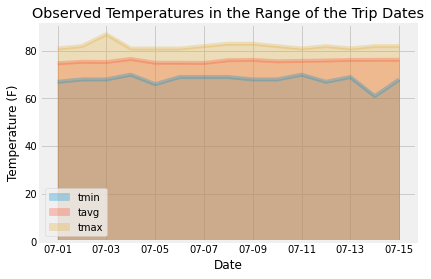

In [35]:
# Plot the daily normals as an area plot with `stacked=False`
dataframe.plot.area(stacked=False, alpha=.3)
plt.title("Observed Temperatures in the Range of the Trip Dates")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")

# Temperature Analysis I

In [36]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def monthly_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [measurement.date, func.avg(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m", measurement.date) == date).all()
    
monthly_normals("06")

[('2010-06-01', 74.94411764705882)]

In [37]:
june = session.query(measurement.date, measurement.tobs).\
    filter(func.strftime("%m", measurement.date) == "06").all()

june_df = pd.DataFrame(june, columns= ['date', 'temperature'])
#june_df = june_df.reset_index(drop= True)
june_df.head()


,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [38]:
december = session.query(measurement.date, measurement.tobs).\
    filter(func.strftime("%m", measurement.date) == "12").all()

december_df = pd.DataFrame(december, columns= ['date', 'temperature'])
#december_df = december_df.reset_index(drop= True)
december_df.head()


,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [39]:
sample1 = june_df
sample1.temperature.mean()

74.94411764705882

In [40]:
sample2 = december_df
sample2.temperature.mean()

71.04152933421226

In [41]:
stats.ttest_ind(sample1.temperature, sample2.temperature, equal_var=False)

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)

# Since the p-value is less than 0.05 we can conclude that the average observed temperatures in June and December are statistically different.
## p-value = 4.19 e-187